<a href="https://colab.research.google.com/github/SyedOmarAli/FaceMaskDetection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

In [1]:
zip_path = "/content/Face_mask_detection.v1-shahhaslaj.yolov11.zip"
extract_path = "/content/Face_mask_detection_dataset"

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
os.listdir(extract_path)

['train',
 'valid',
 'README.dataset.txt',
 'data.yaml',
 'README.roboflow.txt',
 'test']

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.6 MB/s eta 0:00:00


In [27]:
from ultralytics import YOLO

In [28]:
model = YOLO("yolo11n.pt")

In [29]:
!pwd

/content


In [30]:
model.train(data="/content/Face_mask_detection_dataset/data.yaml" ,epochs=50)

Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Face_mask_detection_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7b251e57c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
!find /content -name data.yaml

/content/Face_mask_detection_dataset/data.yaml


In [11]:
!ls runs/detect/train/weights

best.pt  last.pt


In [12]:
!ls runs/detect

train


In [13]:
!ls runs/detect/*/weights

best.pt  last.pt


In [14]:
model = YOLO("runs/detect/train/weights/best.pt")

In [15]:
results = model.predict(
    source="/content/Face_mask_detection_dataset/valid/images",
    save=True,
    conf=0.5
)


image 1/13 /content/Face_mask_detection_dataset/valid/images/103-with-mask_jpg.rf.22809c95513fb113a3011dd8d8075f44.jpg: 640x480 1 with_mask, 55.9ms
image 2/13 /content/Face_mask_detection_dataset/valid/images/104_jpg.rf.ce6f19b1f621db28ffba07a6789f0dba.jpg: 640x608 1 without_mask, 109.4ms
image 3/13 /content/Face_mask_detection_dataset/valid/images/135-with-mask_jpg.rf.10382d9e018878a6c02be1f1015cd638.jpg: 640x480 1 with_mask, 37.3ms
image 4/13 /content/Face_mask_detection_dataset/valid/images/198_jpg.rf.b9f9ce7ea5377c35d2863c0f71248ade.jpg: 640x640 1 without_mask, 35.4ms
image 5/13 /content/Face_mask_detection_dataset/valid/images/207-with-mask_jpg.rf.6511f6d341c5e40163650b4b9addc149.jpg: 640x640 1 with_mask, 31.9ms
image 6/13 /content/Face_mask_detection_dataset/valid/images/85-with-mask_jpg.rf.833fda8a713e71a4324cda33592a2bf2.jpg: 640x480 1 with_mask, 36.7ms
image 7/13 /content/Face_mask_detection_dataset/valid/images/86-with-mask_jpg.rf.4f90edf0d4c2ef2e9cd7f1e5171b20e9.jpg: 640x48

In [16]:
from IPython.display import Image, display
import glob

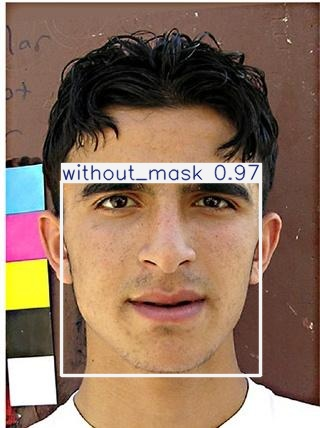

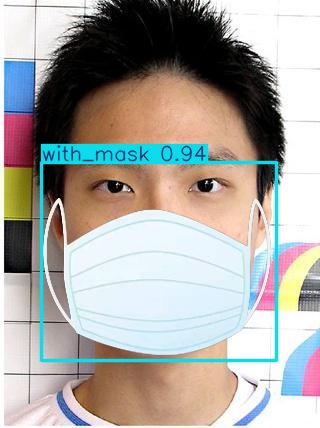

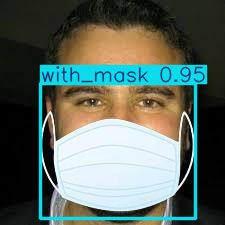

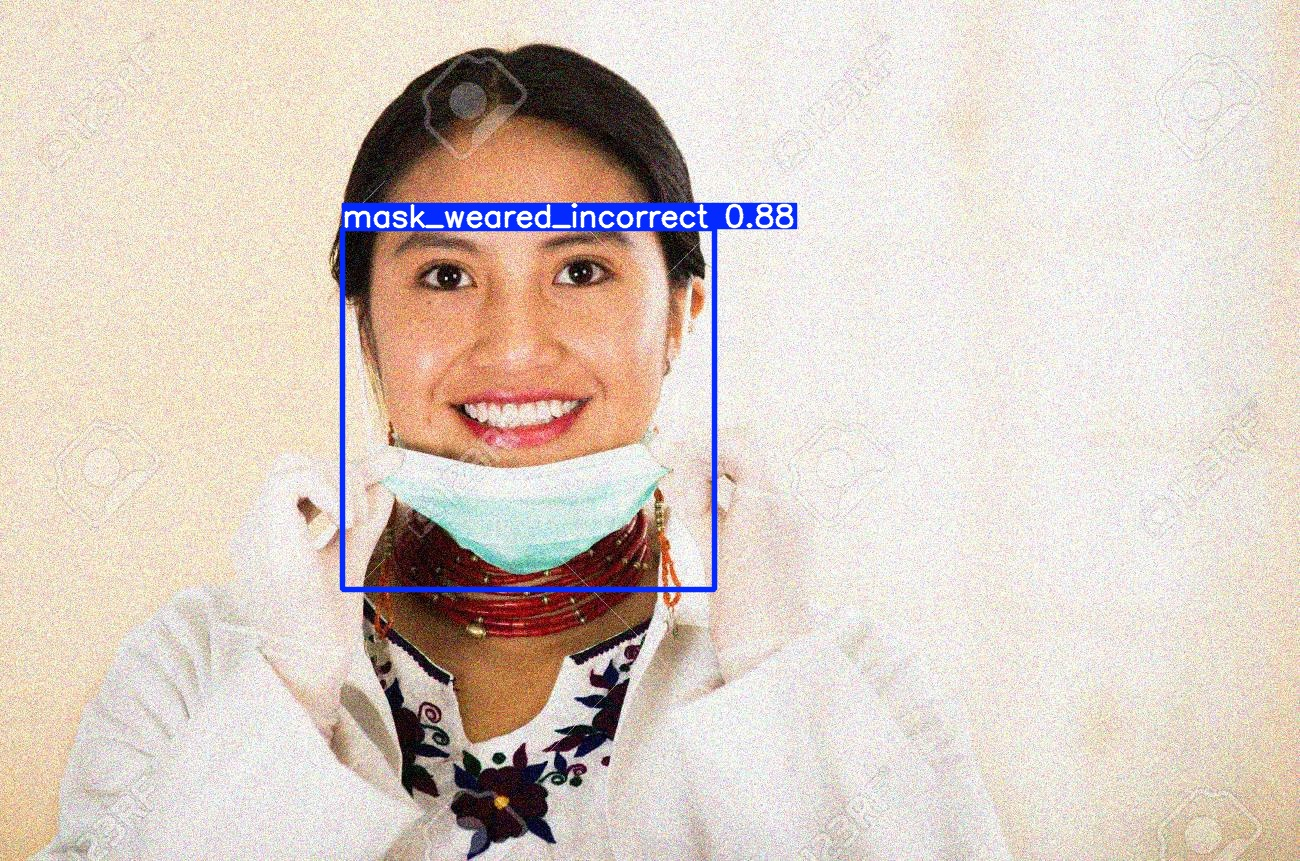

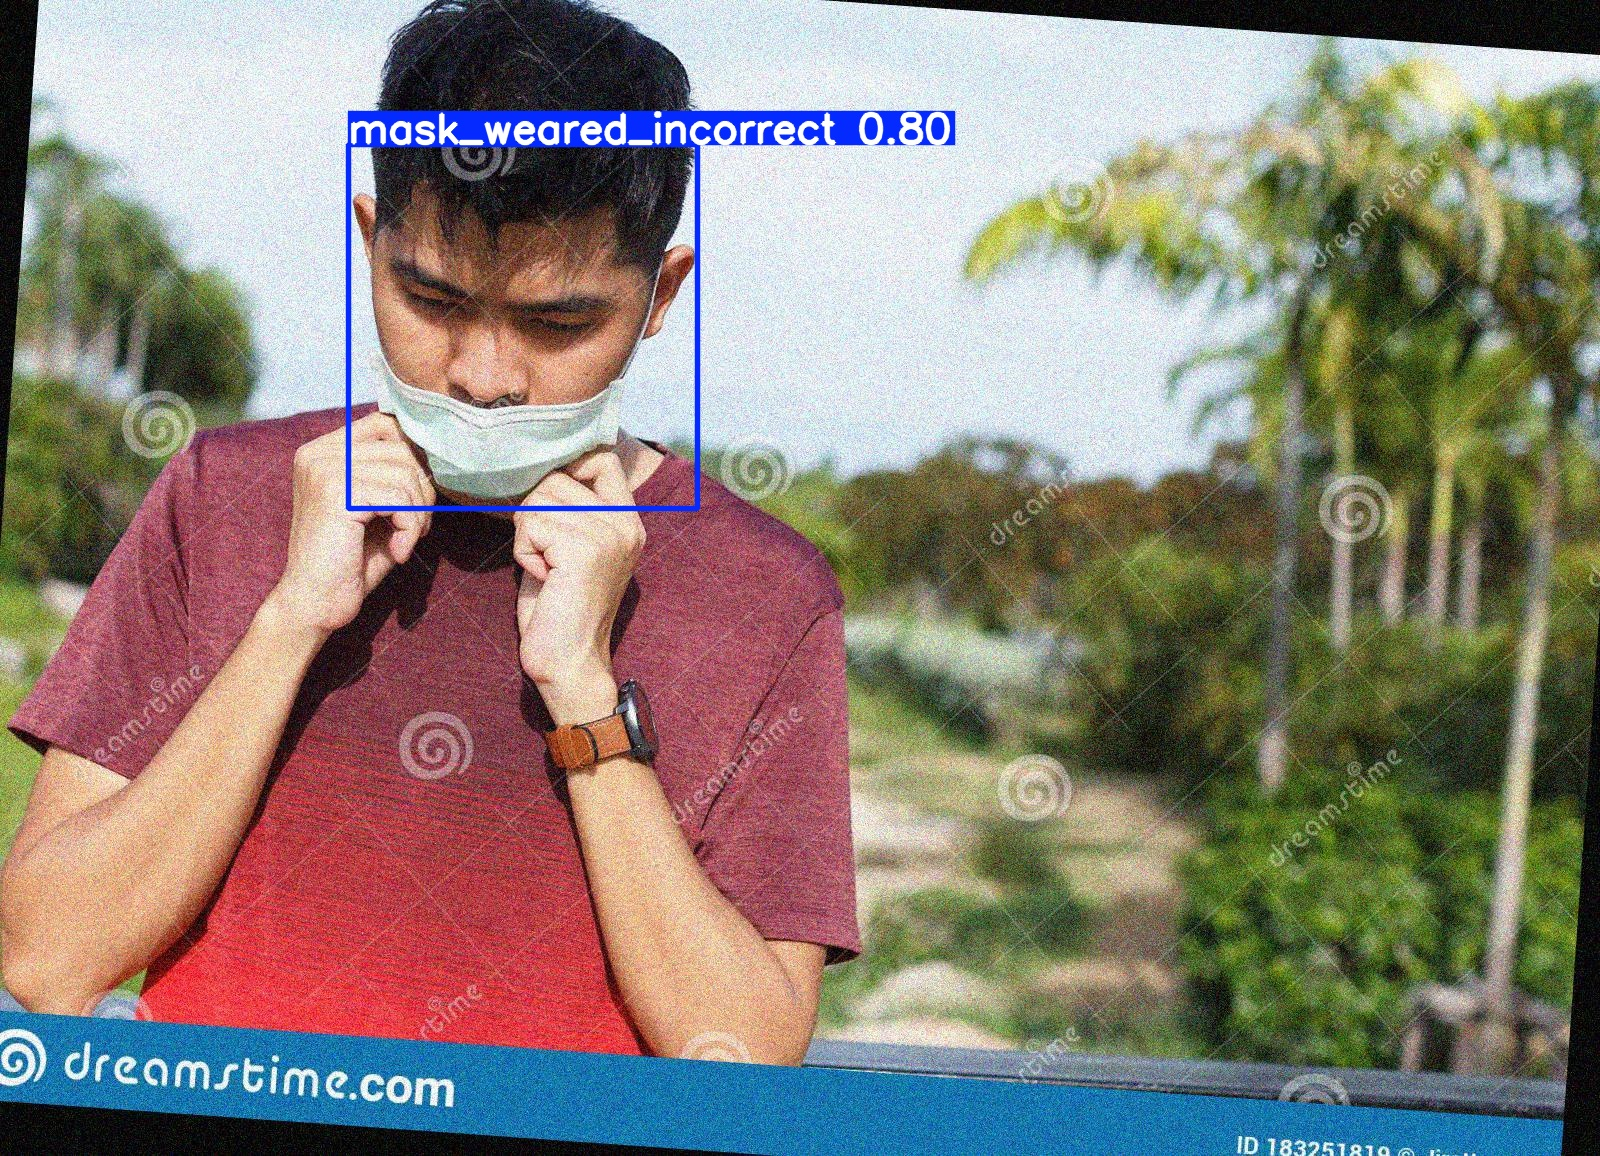

In [17]:
for img in glob.glob("runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=img))

In [18]:
!pip install gradio

In [19]:
model = YOLO("runs/detect/train/weights/best.pt")

In [20]:
import cv2
import numpy as np

In [21]:
def detect_objects(image):
    # YOLO prediction
    results = model.predict(image, conf=0.5)

    # Bounding boxes drawn
    annotated_image = results[0].plot()

    # BGR → RGB (for Gradio)
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    return annotated_image

In [22]:
import gradio as gr

In [23]:
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Detected Output"),
    title="Helmet Detection System",
    description="YOLO-based Object Detection using Deep Learning",
)

In [24]:
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://93c0457a9b82ffef11.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 448x640 1 mask_weared_incorrect, 50.1ms
Speed: 3.3ms preprocess, 50.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 (no detections), 10.2ms
Speed: 3.6ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 640x576 1 with_mask, 51.5ms
Speed: 4.3ms preprocess, 51.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://93c0457a9b82ffef11.gradio.live


In [33]:
predict = model.predict("/content/Face_mask_detection_dataset/train/images/107-with-mask_jpg.rf.a2f525259d61aa0314495b2088638d85.jpg", save=True)


image 1/1 /content/Face_mask_detection_dataset/train/images/107-with-mask_jpg.rf.a2f525259d61aa0314495b2088638d85.jpg: 640x480 1 with_mask, 12.1ms
Speed: 3.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict2


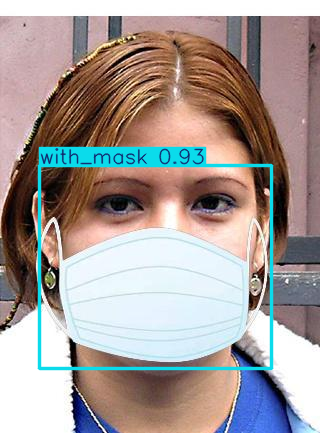

In [34]:
predict[0].show()